In [192]:
import pandas as pd
import os
import numpy as np
dataDir = os.path.join(os.getcwd(),"data")
import matplotlib.pyplot as plt
from astropy.time import Time

plt.rcParams.update({

    # --- Figure Layout ---
    "figure.figsize": (6, 4),           # Default figure size in inches
    "figure.dpi": 150,                  # DPI for crisp rendering
    "savefig.dpi": 300,                 # Higher DPI for saved figures
    "figure.autolayout": True,          # Avoids label overlap

    # --- Font & Text ---
    "font.family": "monospace",             # Or "sans-serif" for modern look
    "font.serif": ["Terminal"],  # Matches many journals
    "font.size": 12,                    # Base font size
    "axes.titlesize": 14,               # Title font size
    "axes.labelsize": 13,               # Axis label size
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "mathtext.fontset": "dejavuserif",  # Matches the serif font

    # --- Line & Marker Styles ---
    "lines.linewidth": 1.8,
    "lines.markersize": 6,
    "lines.markeredgewidth": 0.7,

    # --- Axes ---
    "axes.linewidth": 1.0,              # Frame thickness
    "axes.labelpad": 6,                 # Padding between label and axis
    "axes.grid": True,
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "grid.linewidth": 0.7,
    "axes.spines.top": False,           # Removes top spine
    "axes.spines.right": False,         # Removes right spine

    # --- Ticks ---
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.top": False,
    "ytick.right": False,

    # --- Legend ---
    "legend.frameon": False,
    "legend.handlelength": 2,
    "legend.handletextpad": 0.4,
    "legend.loc": "best",

    # --- Colors and Colormaps ---
    "image.cmap": "viridis",            # Good perceptually uniform default
    "axes.prop_cycle": plt.cycler("color", [
        "#1f77b4", "#ff7f0e", "#2ca02c",
        "#d62728", "#9467bd", "#8c564b",
        "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
    ]),
})

In [193]:
files = os.listdir(dataDir)

In [198]:
files

['alertData_101425.csv',
 'alertData_100625.csv',
 'strategyResults',
 'alertData_101725.csv',
 'alertData_102525.csv',
 'alertData_101025.csv',
 '.ipynb_checkpoints']

In [199]:
bigDF = None

for file in files:
    if file.endswith(".csv"):
        readDF = pd.read_csv(os.path.join(dataDir,file))
        bigDF = pd.concat((bigDF,readDF))
bigDF.set_index("Unnamed: 0",inplace=True)
bigDF.index.names=["Datetime"]

In [214]:
msk = np.logical_and((x.__contains__("GW") for x in bigDF.alert_type), (f.startswith("S") for f in bigDF.source))
bigDF.iloc[msk]

,alert_type,event_trigger_timestamp,instrument0,instrument1,instrument2,is_test,is_update,reward_map0,reward_map1,reward_map10,...,reward_map9993,reward_map9994,reward_map9995,reward_map9996,reward_map9997,reward_map9998,reward_map9999,reward_map_nside,source,timestamp
Datetime,,,,,,,,,,,,,,,,,,,,,
2025-10-10 15:30:47.897000+00:00,lensed_BNS_case_A,2025-10-10T15:25:44.144Z,H1,L1,V1,False,False,False,False,False,...,False,False,False,False,False,False,False,32,S251010bv,1760110247897
2025-10-10 21:33:23.667000+00:00,GW_case_D,2025-10-10T21:28:23.839Z,H1,L1,V1,False,False,False,False,False,...,False,False,False,False,False,False,False,32,S251010en,1760132003667
2025-10-10 23:11:28.136000+00:00,GW_case_D,2025-10-10T23:06:31.774Z,H1,L1,V1,False,False,False,False,False,...,False,False,False,False,False,False,False,32,S251010fk,1760137888136
2025-10-12 02:38:18.746000+00:00,lensed_BNS_case_A,2025-10-12T02:37:43.821Z,H1,L1,V1,False,False,False,False,False,...,False,False,False,False,False,False,False,32,S251012i,1760236698746
2025-10-12 05:29:04.162000+00:00,GW_case_D,2025-10-12T05:24:08.023Z,H1,L1,V1,False,False,False,False,False,...,False,False,False,False,False,False,False,32,S251012an,1760246944162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-09 22:13:55.516000+00:00,GW_case_D,2025-10-09T22:08:56.109Z,H1,L1,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,32,S251009iv,1760048035516
2025-10-09 23:56:19.137000+00:00,GW_case_D,2025-10-09T23:51:19.792Z,H1,L1,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,32,S251009jz,1760054179137
2025-10-10 00:51:43.540000+00:00,GW_case_D,2025-10-10T00:46:48.251Z,H1,L1,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,32,S251010k,1760057503540


In [215]:
GWDF = bigDF[np.logical_and([x.startswith("S") for x in bigDF["source"]],[x.__contains__("GW_case") for x in bigDF["alert_type"]])]
NeutrinoDF = bigDF[bigDF["alert_type"]=='neutrino']

## Evaluate latency in GW alerts from alert timestamp

In [216]:
SilverMask = GWDF["alert_type"]=="GW_case_D"

source                                    S251013ad
event_trigger_timestamp    2025-10-13T02:27:03.888Z
Name: 2025-10-13 02:27:43.998000+00:00, dtype: object
source                                    S250929ad
event_trigger_timestamp    2025-09-29T02:27:03.888Z
Name: 2025-09-29 02:27:43.342000+00:00, dtype: object
source                                    S251006af
event_trigger_timestamp    2025-10-06T02:27:03.888Z
Name: 2025-10-06 02:27:43.331000+00:00, dtype: object
source                                    S251020ad
event_trigger_timestamp    2025-10-20T02:27:03.888Z
Name: 2025-10-20 02:27:43.483000+00:00, dtype: object
source                                    S251005gq
event_trigger_timestamp    2025-10-05T23:40:39.838Z
Name: 2025-10-05 23:41:14.336000+00:00, dtype: object


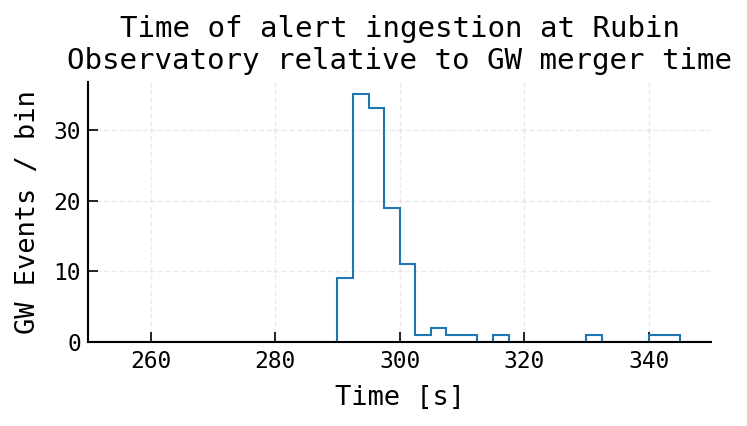

In [222]:
fig,ax = plt.subplots(figsize=(5,3))

for m,lbl in zip([SilverMask,~SilverMask],["Silver","Gold"]):
    relGWDF = GWDF[m]
    delta = pd.to_datetime(relGWDF.index) - pd.to_datetime(relGWDF["event_trigger_timestamp"])
    delta_s = (1/np.power(10,9))*delta.values
#     ax.hist(delta_s.astype(int),bins=np.arange(20,400,step=2.5),label=lbl,histtype='step')
    for ind in np.argwhere(delta_s<200).flatten():
        print(relGWDF.iloc[ind][["source","event_trigger_timestamp"]])

delta = pd.to_datetime(GWDF.index) - pd.to_datetime(GWDF["event_trigger_timestamp"])
delta_s = (1/np.power(10,9))*delta.values
ax.hist(delta_s.astype(int),bins=np.arange(20,400,step=2.5),histtype='step')

ax.set_xlabel("Time [s]")
ax.set_ylabel("GW Events / bin")
ax.set_xlim(250,350)
# ax.legend()
ax.set_title("Time of alert ingestion at Rubin\nObservatory relative to GW merger time")
fig.savefig(os.path.join(os.getcwd(),"preliminaryAlertLatency_LVK.jpg"),dpi=300)

Text(0.5, 1.0, 'Time receipt distribution from\nGW event trigger to receipt at Rubin EFD')

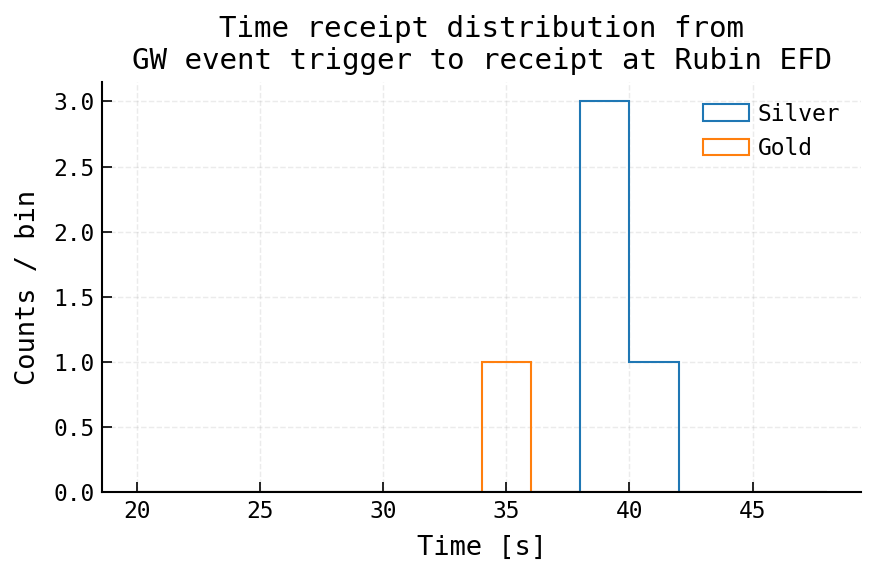

In [160]:
fig,ax = plt.subplots()

for m,lbl in zip([SilverMask,~SilverMask],["Silver","Gold"]):
    relGWDF = GWDF[m]
    delta = pd.to_datetime(relGWDF.index) - pd.to_datetime(relGWDF["event_trigger_timestamp"])
    delta_s = (1/np.power(10,9))*delta.values
    ax.hist(delta_s.astype(int),bins=np.arange(20,50,step=2),label=lbl,histtype='step')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Counts / bin")
ax.legend()
ax.set_title("Time receipt distribution from\nGW event trigger to receipt at Rubin EFD")

Text(0.5, 1.0, 'Time receipt distribution from\nGW event trigger to receipt at Rubin EFD')

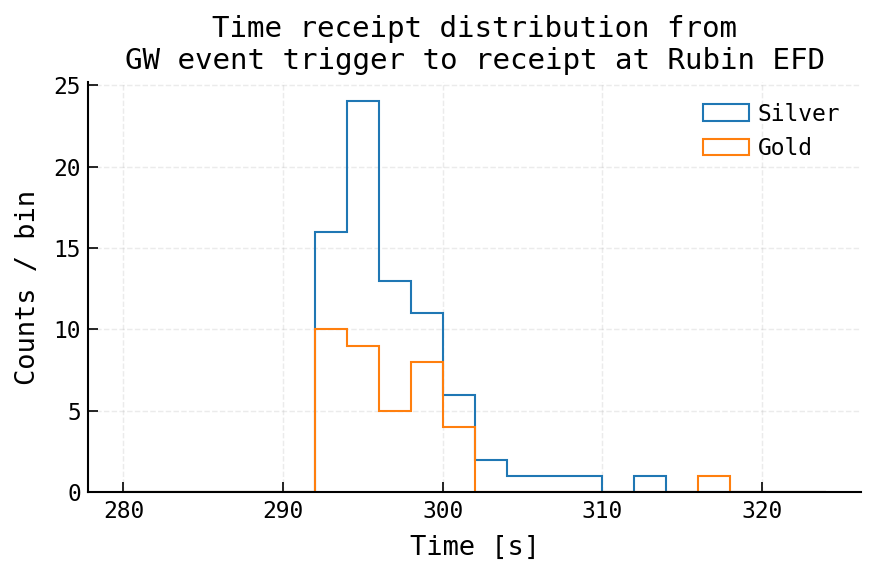

In [161]:
fig,ax = plt.subplots()

for m,lbl in zip([SilverMask,~SilverMask],["Silver","Gold"]):
    relGWDF = GWDF[m]
    delta = pd.to_datetime(relGWDF.index) - pd.to_datetime(relGWDF["event_trigger_timestamp"])
    delta_s = (1/np.power(10,9))*delta.values
    ax.hist(delta_s.astype(int),bins=np.arange(280,325,step=2),label=lbl,histtype='step')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Counts / bin")
ax.legend()
ax.set_title("Time receipt distribution from\nGW event trigger to receipt at Rubin EFD")

## Evaluate latency in Neutrino alerts from alert timestamp

In [171]:
NeutrinoDF.sort_index().iloc[65:85].index

Index(['2025-10-20 02:57:59.052000+00:00', '2025-10-20 11:19:19.515000+00:00',
       '2025-10-20 13:22:01.014000+00:00', '2025-10-21 01:38:44.874000+00:00',
       '2025-10-21 03:41:34.757000+00:00', '2025-10-21 15:58:34.410000+00:00',
       '2025-10-22 02:12:26.592000+00:00', '2025-10-22 14:29:15.745000+00:00',
       '2025-10-22 16:32:02+00:00', '2025-10-22 18:34:52.662000+00:00',
       '2025-10-22 22:40:30.573000+00:00', '2025-10-23 06:51:21.452000+00:00',
       '2025-10-23 08:54:01.930000+00:00', '2025-10-23 12:59:21.861000+00:00',
       '2025-10-23 17:46:23.049000+00:00', '2025-10-24 01:57:33.707000+00:00',
       '2025-10-25 04:32:53.666000+00:00', '2025-10-25 06:35:31.074000+00:00'],
      dtype='object', name='Datetime')

ValueError: time data "2025-10-22 16:32:02+00:00" doesn't match format "%Y-%m-%d %H:%M:%S.%f%z", at position 60. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

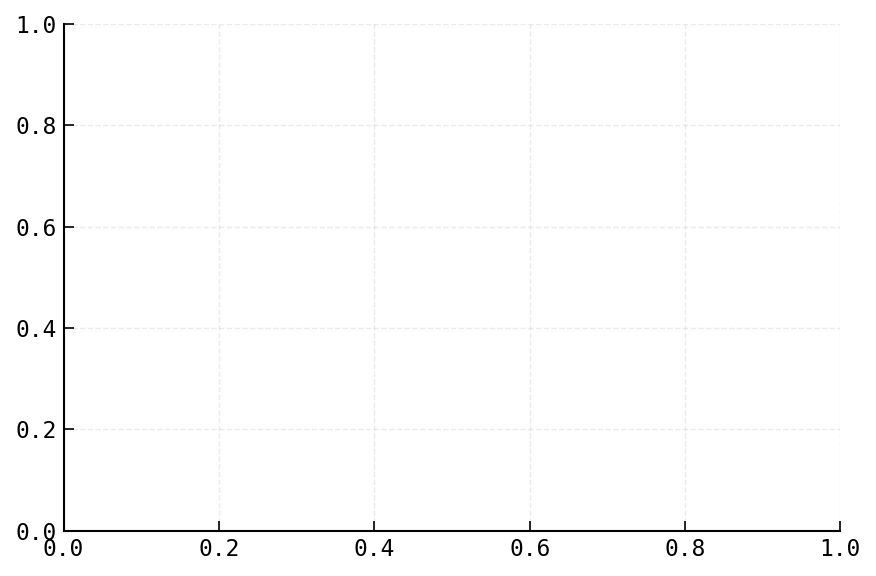

In [164]:
fig,ax = plt.subplots()

delta = pd.to_datetime(NeutrinoDF.index) - pd.to_datetime(NeutrinoDF["event_trigger_timestamp"].str.slice(0,-7),utc=True)
delta_s = (1/np.power(10,9))*delta.values

for ind in np.argwhere(delta_s<3000).flatten():
    print(NeutrinoDF.iloc[ind][["source","event_trigger_timestamp"]])

ax.hist(delta_s.astype(int),bins=np.arange(1900,5501,step=50),histtype='step')

ax.set_xlabel("Time [s]")
ax.set_ylabel("Counts / bin")
ax.set_title("Time receipt distribution from\nNeutrino event trigger to receipt at Rubin EFD")